# States and transitions

The process of receptor modeling often begins by specifying the molecular conformations (states) to be considered and the transitions between these states.

In [1]:
# This code block sets some default options for plotting graphs in SageMath.
# It sets the default figure size, makes the plots transparent, displays 
# edge labels, uses the spring layout algorithm for graph layouts, and sets
# the background color for edge labels.
#
# See https://doc.sagemath.org/html/en/reference/graphs/sage/graphs/graph_plot.html
#

import sage.graphs.graph_plot

# Set the default figure size for plots
sage.graphs.graph_plot.DEFAULT_PLOT_OPTIONS['figsize'] = [3,3]

# Make the plots transparent
sage.graphs.graph_plot.DEFAULT_PLOT_OPTIONS['transparent'] = True

# Display edge labels in the plots
sage.graphs.graph_plot.DEFAULT_PLOT_OPTIONS['edge_labels'] = False

# Set the background color for edge labels to cyan
sage.graphs.graph_plot.DEFAULT_PLOT_OPTIONS['edge_labels_background'] = 'cyan'

## Undirected graphs as state-transition diagrams

For example, the following graph may represent a receptor model that has four states:

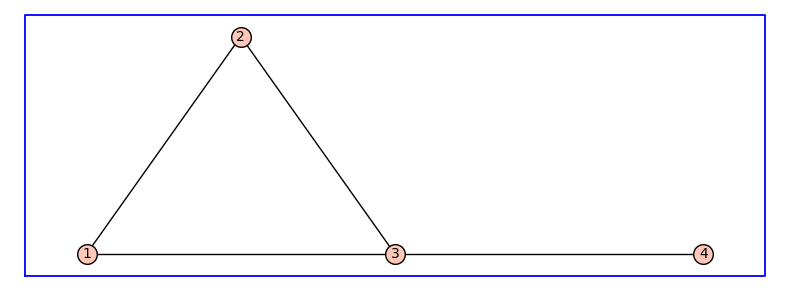

In [2]:
G_undirected = Graph({1: [2, 3], 2: [3], 3: [4]})
vertex_positions = {1: (0, 0), 2: (1, 1.41), 3: (2, 0), 4: (4,0)}
G_undirected.plot(figsize=8,pos=vertex_positions,graph_border=True)

The graph `G_undirected` is constructed by calling the Sagemath command [`Graph()`](https://doc.sagemath.org/html/en/reference/graphs/sage/graphs/graph.html#supported-formats) with a dictionary that associates neighbors to each vertex.  The vertices of the graph `G` are the integers 1, 2, 3, and 4.  The method `plot()` shows the graph `G_undirected` using a dictionary `vertex_positions` that specifies the locations of each vertex.

The [adjacency matrix](https://en.wikipedia.org/wiki/Adjacency_matrix) of this graph is

In [3]:
G_undirected.adjacency_matrix()

[0 1 1 0]
[1 0 1 0]
[1 1 0 1]
[0 0 1 0]

The elements of the adjacency matrix indicate whether pairs of vertices are adjacent or not in the graph. The adjacency matrix of a graph should be distinguished from its [incidence matrix](https://en.wikipedia.org/wiki/Incidence_matrix) and its [degree matrix](https://en.wikipedia.org/wiki/Degree_matrix).

```{note}
The graphs used here to represent receptor states and transitions will be both connected and simple.
* _Connected_: at least one path joins every pair of vertices.
* _Simple_: no loops or multiple edges.
```

## Directed graphs as state-transition diagrams 

In the context of receptor modeling, the undirected graph above is interpreted as a short-hand for the following _directed_ graph.

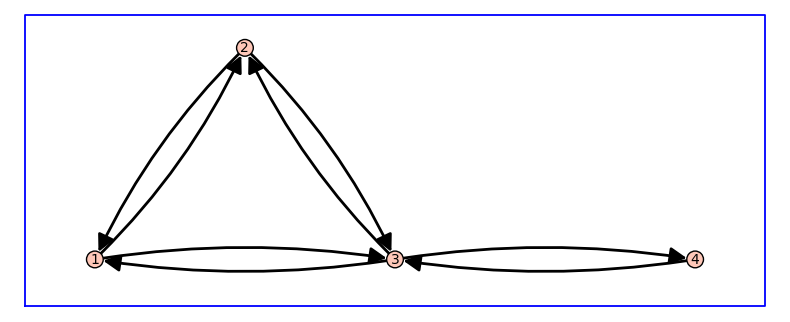

In [4]:
G_directed = G_undirected.to_directed()
G_directed.plot(figsize=8,edge_labels=True,pos=vertex_positions,graph_border=True)

The method `to_directed()` produces `G_directed` as the _symmetric_ digraph associated to `G_undirected`, in which adjacent vertices are  connected in both directions.

```{note}
Receptor state-transition diagrams  will always be symmetric directed graphs, that is, for every edge from vertex `i` to vertex `j`, there is also an edge from vertex `j` to vertex `i`.  Thus, the state-transtion diagrams for a receptor model may, for simplicity, be illustrated as an undirected graph. We will refer to such undirected graphs as the _topology_ of the receptor model.
```

## Transition rate constants 

In the context of receptor modeling, state-transition diagrams are usually _weighted_, as shown here.

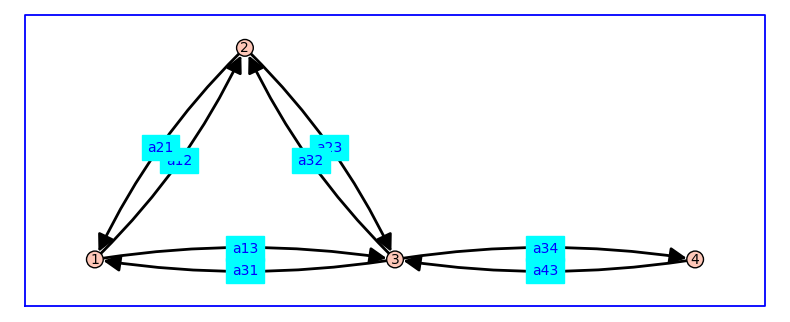

In [5]:
var('a12, a21, a13, a31, a23, a32, a34, a43')
d = {1: {2:a12, 3:a13}, 2: {1:a21, 3:a23}, 3: {2:a32, 1:a31, 4:a34}, 4: {3:a43}};
G = DiGraph(d,weighted=True)
G.plot(figsize=8,edge_labels=True,pos=vertex_positions,graph_border=True)

In the code above, a directed graph `G` is constructed by calling the `Sagemath` command [`DiGraph()`](https://doc.sagemath.org/html/en/reference/graphs/sage/graphs/digraph.html#methods).  The input argument `d` is a [Python dictionary](https://doc.sagemath.org/html/en/thematic_tutorials/tutorial-programming-python.html) that assigns out-neighbors to each vertex and corresponding edge labels.
The edge labels are not _strings_, but _symbolic variables_ defined using Sagemath's `var` command.
For example, the symbolic variable `a12` stands for the rate of transition between state 1 and 2. 

Because these rate constants are symbolic variables, Sagemath will evaluate expressions such as

In [6]:
f = a12 * (a21 + a13)^2 / a13
f.expand()

a12*a13 + 2*a12*a21 + a12*a21^2/a13

One reason for using symbolic variables is that we can produce symbolic expressions important quantities using the [module for graphs and digraphs](https://doc.sagemath.org/html/en/reference/graphs/index.html) available in `Sagemath`. For example, the weighted adjacency matrix for `G` is

In [7]:
G.weighted_adjacency_matrix()

[  0 a12 a13   0]
[a21   0 a23   0]
[a31 a32   0 a34]
[  0   0 a43   0]

The [Laplacian matrix](https://en.wikipedia.org/wiki/Laplacian_matrix) of `G` is

In [8]:
G.laplacian_matrix()

[      a21 + a31            -a12            -a13               0]
[           -a21       a12 + a32            -a23               0]
[           -a31            -a32 a13 + a23 + a43            -a34]
[              0               0            -a43             a34]

This matrix is sometimes referred to as the `combinatorial Laplacian matrix` of the weighted directed graph `G`.